In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu

In [2]:
# Load the data
df1 = pd.read_csv('clean_data/4-1_merged.csv')
df2 = pd.read_csv('clean_data/4-2_merged.csv')
df3 = pd.read_csv('clean_data/4-3_merged.csv')

pretest1 = pd.read_csv('clean_data/4-1_pretest.csv')
pretest2 = pd.read_csv('clean_data/4-2_pretest.csv')
pretest3 = pd.read_csv('clean_data/4-3_pretest.csv')

posttest1 = pd.read_csv('clean_data/4-1_posttest.csv')
posttest2 = pd.read_csv('clean_data/4-2_posttest.csv')
posttest3 = pd.read_csv('clean_data/4-3_posttest.csv')

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
n1 = df1.shape[0]
n2 = df2.shape[0]
n3 = df3.shape[0]

(14, 15)
(14, 15)
(10, 15)


# Pre-test Analysis

## Question 1: Have you ever interacted with a social robot?
- 1: Never
- 2: Once or twice
- 3: More than 3 times in my life
- 4: Every week

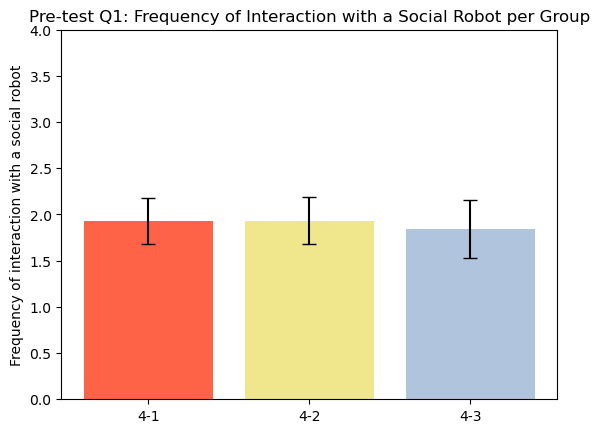

In [5]:
group1_q1_mean = pretest1['Q1'].mean()
group1_q1_se = pretest1['Q1'].std() / np.sqrt(n1)
group2_q1_mean = pretest2['Q1'].mean()
group2_q1_se = pretest2['Q1'].std() / np.sqrt(n2)
group3_q1_mean = pretest3['Q1'].mean()
group3_q1_se = pretest3['Q1'].std() / np.sqrt(n3)

# Plot the means and standard errors
class_colors = ['tomato', 'khaki', 'lightsteelblue']
plt.bar(['4-1', '4-2', '4-3'], [group1_q1_mean, group2_q1_mean, group3_q1_mean], yerr=[group1_q1_se, group2_q1_se, group3_q1_se], capsize=5, color=class_colors)
plt.ylabel('Frequency of interaction with a social robot')
plt.ylim(0,4)
plt.title('Pre-test Q1: Frequency of Interaction with a Social Robot per Group')
plt.show()

## Questions 2,3 and 4

- Q2: How much you like social robots?

- How much you would like to have a social robot to do the following activities:

    - Q3: Helping with your tasks/lessons in the classroom?

    - Q4: Helping with your lessons at home (homework)?

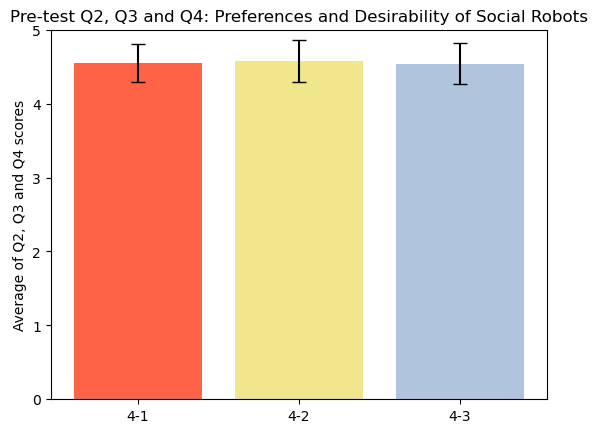

In [7]:
# Class 4-1

# Average of Q2, Q3 and Q4
n1 = pretest1.shape[0]
avg2 = pretest1['Q2'].mean()
avg3 = pretest1['Q3'].mean()
avg4 = pretest1['Q4'].mean()
avg_41 = (avg2 + avg3 + avg4) / 3
se_41 = (pretest1['Q2'].std() + pretest1['Q3'].std() + pretest1['Q4'].std()) / (3 * np.sqrt(n1))

# Class 4-2

# Average of Q2, Q3 and Q4
n2 = pretest2.shape[0]
avg2 = pretest2['Q2'].mean()
avg3 = pretest2['Q3'].mean()
avg4 = pretest2['Q4'].mean()
avg_42 = (avg2 + avg3 + avg4) / 3
se_42 = (pretest2['Q2'].std() + pretest2['Q3'].std() + pretest2['Q4'].std()) / (3 * np.sqrt(n2))


# Class 4-3

# Average of Q2, Q3 and Q4
n3 = pretest3.shape[0]
avg2 = pretest3['Q2'].mean()
avg3 = pretest3['Q3'].mean()
avg4 = pretest3['Q4'].mean()
avg_43 = (avg2 + avg3 + avg4) / 3
se_42 = (pretest3['Q2'].std() + pretest3['Q3'].std() + pretest3['Q4'].std()) / (3 * np.sqrt(n3))

# Plot
plt.bar(['4-1', '4-2', '4-3'], [avg_41, avg_42, avg_43], yerr=[se_41, se_42, se_42], capsize=5, color=class_colors)
plt.ylabel('Average of Q2, Q3 and Q4 scores')
plt.ylim(0,5)
plt.title('Pre-test Q2, Q3 and Q4: Preferences and Desirability of Social Robots')
plt.show()

# Questions 8 and 9: Favorite lessons and lessons that the robot could help with
- Mathematics & Technologies
- Languages & Literature
- Social Sciences & Arts

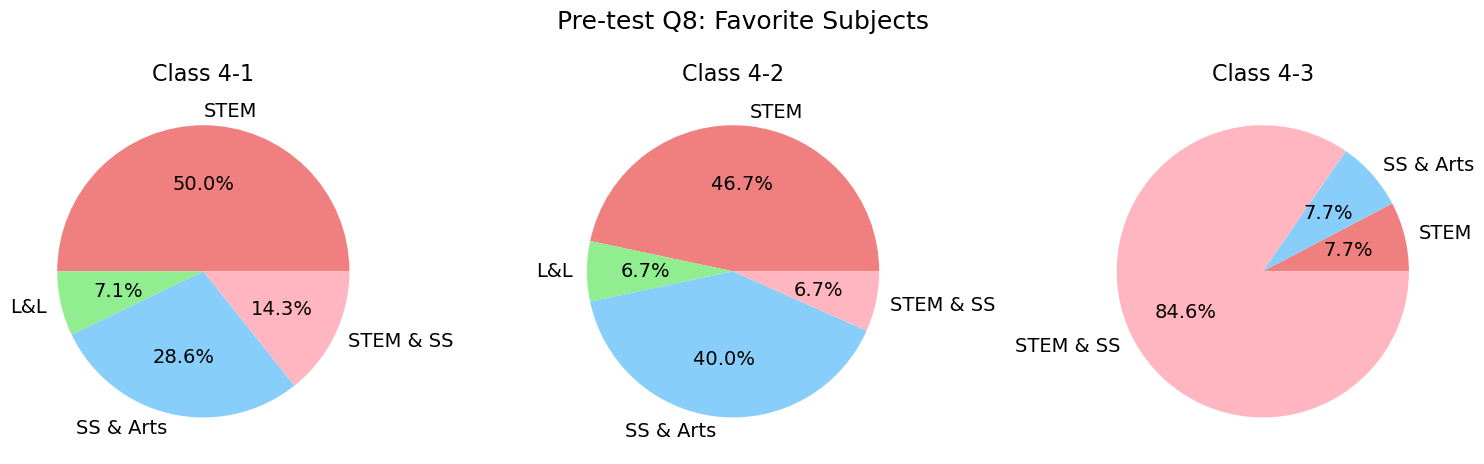

In [75]:
fav1 = pretest1.groupby('Q8').size()
help1 = pretest1.groupby('Q9').size()

fav2 = pretest2.groupby('Q8').size()
help2 = pretest2.groupby('Q9').size()

fav3 = pretest3.groupby('Q8').size()
help3 = pretest3.groupby('Q9').size()


labels = ["STEM", "L&L", "SS & Arts", "STEM & SS"]
slice_colors = ['lightcoral', 'lightgreen', 'lightskyblue', 'lightpink']

data_fav_1 = [7, 1, 4, 2]
data_fav_2 = [7, 1, 6, 1]
labels_3 = ["STEM", "SS & Arts", "STEM & SS"]
slice_colors_3 = ['lightcoral', 'lightskyblue', 'lightpink']
data_fav_3 = [1, 1, 11]


# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  

# Create the pie charts
axs[0].pie(data_fav_1, labels=labels, autopct='%1.1f%%', colors= slice_colors, textprops={'fontsize': 14})
axs[0].set_title('Class 4-1', fontsize=16)

axs[1].pie(data_fav_2, labels=labels, autopct='%1.1f%%', colors= slice_colors, textprops={'fontsize': 14})
axs[1].set_title('Class 4-2', fontsize=16)

axs[2].pie(data_fav_3, labels=labels_3, autopct='%1.1f%%', colors= slice_colors_3, textprops={'fontsize': 14})
axs[2].set_title('Class 4-3', fontsize=16)

plt.suptitle('Pre-test Q8: Favorite Subjects', fontsize=18)

plt.tight_layout()
plt.show()


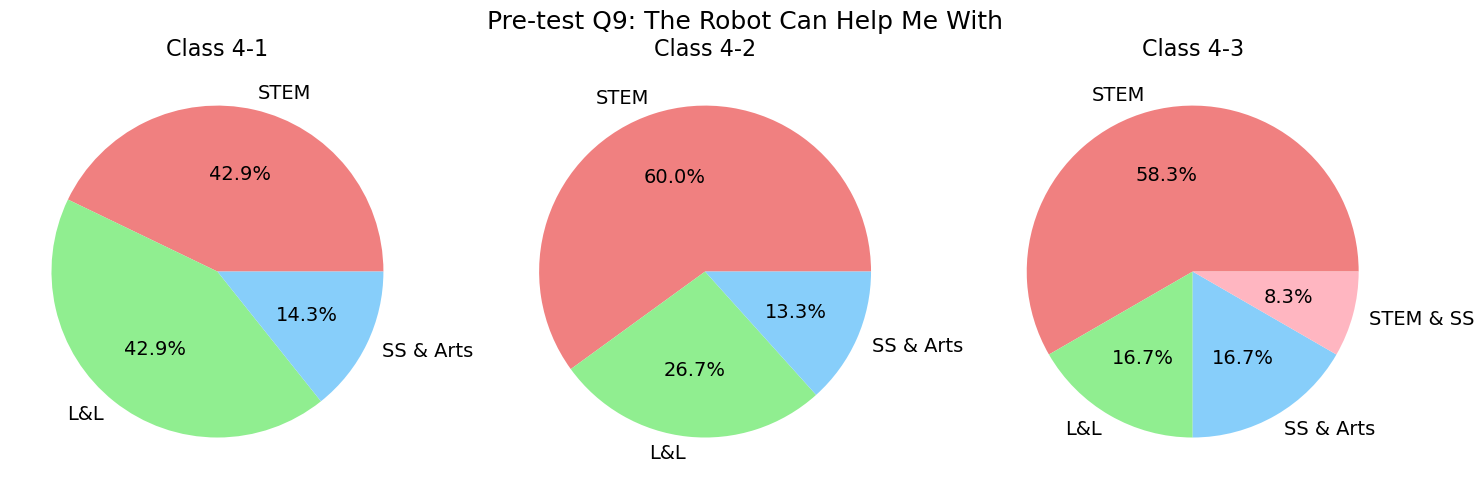

In [76]:
data_help_1 = [6, 6, 2]
data_help_2 = [9, 4, 2]
data_help_3 = [7, 2, 2, 1]

labels_1 = ["STEM", "L&L", "SS & Arts"]
slice_colors_1 = ['lightcoral', 'lightgreen', 'lightskyblue']

# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  

# Create the pie charts
axs[0].pie(data_help_1, labels=labels_1, autopct='%1.1f%%', colors= slice_colors_1, textprops={'fontsize': 14})
axs[0].set_title('Class 4-1', fontsize=16)

axs[1].pie(data_help_2, labels=labels_1, autopct='%1.1f%%', colors= slice_colors_1, textprops={'fontsize': 14})
axs[1].set_title('Class 4-2', fontsize=16)

axs[2].pie(data_help_3, labels=labels, autopct='%1.1f%%', colors= slice_colors, textprops={'fontsize': 14})
axs[2].set_title('Class 4-3', fontsize=16)

plt.suptitle('Pre-test Q9: The Robot Can Help Me With', fontsize=18)

plt.tight_layout()
plt.show()

# Correct answers

In [10]:
# Average of correct answers for 4-1

avg_phi1 = df1['Nb correct answers_phi'].mean()
se_phi1 = df1['Nb correct answers_phi'].std() / np.sqrt(n1)
avg_human1 = df1['Nb correct answers_human'].mean()
se_human1 = df1['Nb correct answers_human'].std() / np.sqrt(n1)
avg_turbo1 = df1['Nb correct answers_turbo'].mean()
se_turbo1 = df1['Nb correct answers_turbo'].std() / np.sqrt(n1)

print('Average of correct answers for 4-1')
print('Phi:', '{:.2f}'.format(avg_phi1)) # food-chain
print('Human:', '{:.2f}'.format(avg_human1)) # changes in the environment
print('Turbo:', '{:.2f}'.format(avg_turbo1)) # working together

Average of correct answers for 4-1
Phi: 2.71
Human: 2.21
Turbo: 1.43


In [11]:
# Average of correct answers for 4-2

avg_phi2 = df2['Nb correct answers_phi'].mean()
se_phi2 = df2['Nb correct answers_phi'].std() / np.sqrt(n2)
avg_human2 = df2['Nb correct answers_human'].mean()
se_human2 = df2['Nb correct answers_human'].std() / np.sqrt(n2)
avg_turbo2 = df2['Nb correct answers_turbo'].mean()
se_turbo2 = df2['Nb correct answers_turbo'].std() / np.sqrt(n2)

print('Average of correct answers for 4-2')
print('Phi:', '{:.2f}'.format(avg_phi2)) # changes in the environment
print('Human:', '{:.2f}'.format(avg_human2)) # working together
print('Turbo:', '{:.2f}'.format(avg_turbo2)) # food-chain

Average of correct answers for 4-2
Phi: 1.64
Human: 1.43
Turbo: 0.07


In [12]:
# Average of correct answers for 4-3

avg_phi3 = df3['Nb correct answers_phi'].mean()
se_phi3 = df3['Nb correct answers_phi'].std() / np.sqrt(n3)
avg_human3 = df3['Nb correct answers_human'].mean()
se_human3 = df3['Nb correct answers_human'].std() / np.sqrt(n3)
avg_turbo3 = df3['Nb correct answers_turbo'].mean()
se_turbo3 = df3['Nb correct answers_turbo'].std() / np.sqrt(n3)

print('Average of correct answers for 4-3')
print('Phi:', '{:.2f}'.format(avg_phi3)) # working together
print('Human:', '{:.2f}'.format(avg_human3)) # food-chain
print('Turbo:', '{:.2f}'.format(avg_turbo3)) # changes in the environment

Average of correct answers for 4-3
Phi: 0.70
Human: 1.80
Turbo: 2.30


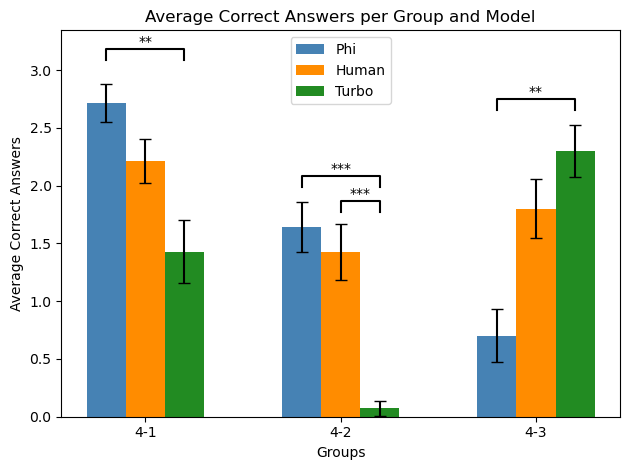

In [13]:
groups = ['4-1', '4-2', '4-3']
models = ['Phi', 'Human', 'Turbo']
model_colors = ['steelblue', 'darkorange', 'forestgreen']
# Average correct answers
avgs = {
    '4-1': [avg_phi1, avg_human1, avg_turbo1],
    '4-2': [avg_phi2, avg_human2, avg_turbo2],
    '4-3': [avg_phi3, avg_human3, avg_turbo3],
} 

# Standard errors
ses = {
    '4-1': [se_phi1, se_human1, se_turbo1],
    '4-2': [se_phi2, se_human2, se_turbo2],
    '4-3': [se_phi3, se_human3, se_turbo3],
}

# Plotting
x = np.arange(len(groups))  # Group positions
width = 0.2  # Bar width

fig, ax = plt.subplots()

# Plot each model
for i, model in enumerate(models):
    ax.bar(x + i * width, [avgs[group][i] for group in groups], width, label=model, color=model_colors[i], yerr = [ses[group][i] for group in groups], capsize=4)

# Customizing the plot
ax.set_xlabel('Groups')
ax.set_ylabel('Average Correct Answers')
ax.set_title('Average Correct Answers per Group and Model')
ax.set_xticks(x + width)
ax.set_xticklabels(groups)
ax.legend()

# Add annotation for significance idfferences
# 4-1
x1, x2 = 0, 0.4  # Positions of the bars to annotate (blue and green)
y, h, col = max(avgs['4-1']) + max(ses['4-1']) + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '**', ha='center', va='bottom', color=col)

# 4-2
x1, x2 = 1, 1.4  # Positions of the bars to annotate (blue and green)
y, h, col = max(avgs['4-2']) + max(ses['4-2']) + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '***', ha='center', va='bottom', color=col)
x1, x2 = 1.2, 1.4  # Positions of the bars to annotate (blue and orange)
y, h, col = avgs['4-2'][1] + ses['4-2'][1] + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '***', ha='center', va='bottom', color=col)

# 4-3
x1, x2 = 2, 2.4  # Positions of the bars to annotate (blue and green)
y, h, col = max(avgs['4-3']) + max(ses['4-3']) + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '**', ha='center', va='bottom', color=col)

# Show plot
plt.tight_layout()
plt.show()

In [14]:
correct_answers_columns = ['Nb correct answers_phi', 'Nb correct answers_human', 'Nb correct answers_turbo']

# 4-1

# Check Assumptions
# 1. Normality (Shapiro-Wilk Test)
print("Normality Check:")
for model in correct_answers_columns:
    # The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
    stat, p = shapiro(df1[model])
    print(f"{model}: W={stat:.2f}, p={p:.3f}")

# 2. Homogeneity of Variance (Levene Test)
# The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
stat, p = levene(df1['Nb correct answers_phi'], df1['Nb correct answers_human'], df1['Nb correct answers_turbo'])
print(f"\nHomogeneity of Variances (Levene Test): W={stat:.2f}, p={p:.3f}")

# Proceed with ANOVA if assumptions are satisfied
if all(shapiro(df1[model])[1] > 0.05 for model in correct_answers_columns) and p > 0.05:
    # ANOVA
    model1 = df1['Nb correct answers_phi']
    model2 = df1['Nb correct answers_human']
    model3 = df1['Nb correct answers_turbo']
    anova_result = f_oneway(model1, model2, model3)
    print(f"\nANOVA Result: F={anova_result.statistic:.2f}, p={anova_result.pvalue:.3f}")

    # Post-hoc test (if ANOVA is significant)
    if anova_result.pvalue < 0.05:
        # Reshape for Tukey test
        melted = df1[correct_answers_columns].melt(var_name='model', value_name='correct_answers')
        tukey_result = pairwise_tukeyhsd(endog=melted['correct_answers'], 
                                         groups=melted['model'], alpha=0.05)
        print("\nPost-hoc Test Results:")
        print(tukey_result)
else:
    print("\nAssumptions not satisfied. ANOVA not performed.")


Normality Check:
Nb correct answers_phi: W=0.55, p=0.000
Nb correct answers_human: W=0.81, p=0.006
Nb correct answers_turbo: W=0.84, p=0.018

Homogeneity of Variances (Levene Test): W=1.46, p=0.245

Assumptions not satisfied. ANOVA not performed.


In [15]:
# 4-2

# Check Assumptions
# 1. Normality (Shapiro-Wilk Test)
print("Normality Check:")
for model in correct_answers_columns:
    # The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
    stat, p = shapiro(df2[model])
    print(f"{model}: W={stat:.2f}, p={p:.3f}")

# 2. Homogeneity of Variance (Levene Test)
# The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
stat, p = levene(df2['Nb correct answers_phi'], df2['Nb correct answers_human'], df2['Nb correct answers_turbo'])
print(f"\nHomogeneity of Variances (Levene Test): W={stat:.2f}, p={p:.3f}")

# Proceed with ANOVA if assumptions are satisfied
if all(shapiro(df2[model])[1] > 0.05 for model in correct_answers_columns) and p > 0.05:
    # ANOVA
    model1 = df2['Nb correct answers_phi']
    model2 = df2['Nb correct answers_human']
    model3 = df2['Nb correct answers_turbo']
    anova_result = f_oneway(model1, model2, model3)
    print(f"\nANOVA Result: F={anova_result.statistic:.2f}, p={anova_result.pvalue:.3f}")

    # Post-hoc test (if ANOVA is significant)
    if anova_result.pvalue < 0.05:
        # Reshape for Tukey test
        melted = df2[correct_answers_columns].melt(var_name='model', value_name='correct_answers')
        tukey_result = pairwise_tukeyhsd(endog=melted['correct_answers'], 
                                         groups=melted['model'], alpha=0.05)
        print("\nPost-hoc Test Results:")
        print(tukey_result)
else:
    print("\nAssumptions not satisfied. ANOVA not performed.")


Normality Check:
Nb correct answers_phi: W=0.77, p=0.002
Nb correct answers_human: W=0.84, p=0.019
Nb correct answers_turbo: W=0.30, p=0.000

Homogeneity of Variances (Levene Test): W=3.38, p=0.044

Assumptions not satisfied. ANOVA not performed.


In [16]:
# 4-3

# Check Assumptions
# 1. Normality (Shapiro-Wilk Test)
print("Normality Check:")
for model in correct_answers_columns:
    # The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
    stat, p = shapiro(df3[model])
    print(f"{model}: W={stat:.2f}, p={p:.3f}")

# 2. Homogeneity of Variance (Levene Test)
# The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
stat, p = levene(df3['Nb correct answers_phi'], df3['Nb correct answers_human'], df3['Nb correct answers_turbo'])
print(f"\nHomogeneity of Variances (Levene Test): W={stat:.2f}, p={p:.3f}")

# Proceed with ANOVA if assumptions are satisfied
if all(shapiro(df3[model])[1] > 0.05 for model in correct_answers_columns) and p > 0.05:
    # ANOVA
    model1 = df3['Nb correct answers_phi']
    model2 = df3['Nb correct answers_human']
    model3 = df3['Nb correct answers_turbo']
    anova_result = f_oneway(model1, model2, model3)
    print(f"\nANOVA Result: F={anova_result.statistic:.2f}, p={anova_result.pvalue:.3f}")

    # Post-hoc test (if ANOVA is significant)
    if anova_result.pvalue < 0.05:
        # Reshape for Tukey test
        melted = df3[correct_answers_columns].melt(var_name='model', value_name='correct_answers')
        tukey_result = pairwise_tukeyhsd(endog=melted['correct_answers'], 
                                         groups=melted['model'], alpha=0.05)
        print("\nPost-hoc Test Results:")
        print(tukey_result)
else:
    print("\nAssumptions not satisfied. ANOVA not performed.")


Normality Check:
Nb correct answers_phi: W=0.78, p=0.008
Nb correct answers_human: W=0.76, p=0.004
Nb correct answers_turbo: W=0.78, p=0.008

Homogeneity of Variances (Levene Test): W=0.17, p=0.845

Assumptions not satisfied. ANOVA not performed.


We will perform a non-parametric test because non-parametric tests do not assume normality or homogeneity of variance.

In [17]:
# 4-1



stat, p = kruskal(df1['Nb correct answers_phi'], df1['Nb correct answers_human'], df1['Nb correct answers_turbo'])
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")



# Combine data into a single DataFrame for the test
melted = df1[correct_answers_columns].melt(var_name='model', value_name='correct_answers')
dunn_result = posthoc_dunn(melted, val_col='correct_answers', group_col='model', p_adjust='bonferroni')
print(dunn_result)



Kruskal-Wallis Test: H=12.65, p=0.002
                          Nb correct answers_human  Nb correct answers_phi  \
Nb correct answers_human                  1.000000                0.294510   
Nb correct answers_phi                    0.294510                1.000000   
Nb correct answers_turbo                  0.172053                0.001136   

                          Nb correct answers_turbo  
Nb correct answers_human                  0.172053  
Nb correct answers_phi                    0.001136  
Nb correct answers_turbo                  1.000000  


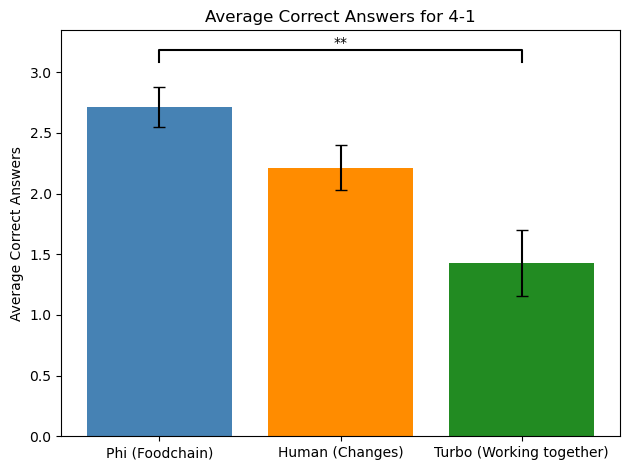

In [18]:
# 4-1

avgs_1 = [avg_phi1, avg_human1, avg_turbo1] 
ses_1 = [se_phi1, se_human1, se_turbo1]

# Create bar plot
x_positions = np.arange(len(avgs_1))  # [0, 1, 2]
labels = ['Phi (Foodchain)', 'Human (Changes)', 'Turbo (Working together)']

plt.bar(x_positions, avgs_1, yerr=ses_1, color=model_colors, capsize=4)
plt.xticks(x_positions, labels)
plt.ylabel('Average Correct Answers')
plt.title('Average Correct Answers for 4-1')

# Add annotation for significant difference
x1, x2 = 0, 2  # Positions of the bars to annotate (blue and green)
y, h, col = max(avgs_1) + max(ses_1) + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '**', ha='center', va='bottom', color=col)

plt.tight_layout()
plt.show()


In [19]:
# 4-2

stat, p = kruskal(df2['Nb correct answers_phi'], df2['Nb correct answers_human'], df2['Nb correct answers_turbo'])
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")



# Combine data into a single DataFrame for the test
melted = df2[correct_answers_columns].melt(var_name='model', value_name='correct_answers')
dunn_result = posthoc_dunn(melted, val_col='correct_answers', group_col='model', p_adjust='bonferroni')
print(dunn_result)

Kruskal-Wallis Test: H=20.38, p=0.000
                          Nb correct answers_human  Nb correct answers_phi  \
Nb correct answers_human                  1.000000                1.000000   
Nb correct answers_phi                    1.000000                1.000000   
Nb correct answers_turbo                  0.000964                0.000095   

                          Nb correct answers_turbo  
Nb correct answers_human                  0.000964  
Nb correct answers_phi                    0.000095  
Nb correct answers_turbo                  1.000000  


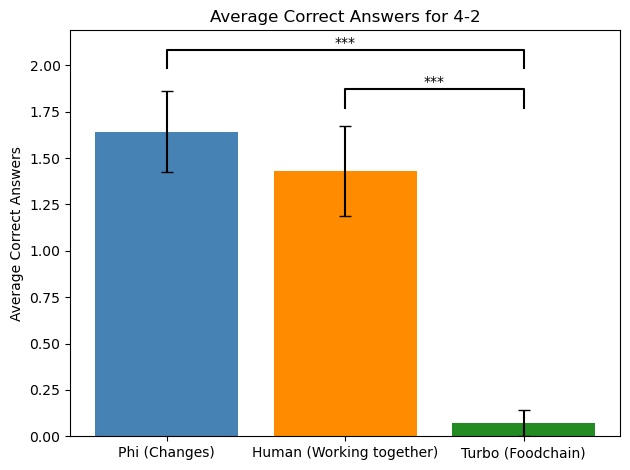

In [20]:
# 4-2

avgs_2 = [avg_phi2, avg_human2, avg_turbo2] 
ses_2 = [se_phi2, se_human2, se_turbo2]

# Create bar plot
x_positions = np.arange(len(avgs_2))  # [0, 1, 2]
labels = ['Phi (Changes)', 'Human (Working together)', 'Turbo (Foodchain)']

plt.bar(x_positions, avgs_2, yerr=ses_2, color=model_colors, capsize=4)
plt.xticks(x_positions, labels)
plt.ylabel('Average Correct Answers')
plt.title('Average Correct Answers for 4-2')

# Add annotation for significant difference
# Turbo and phi
x1, x2 = 0, 2  # Positions of the bars to annotate (blue and green)
y, h, col = max(avgs_2) + max(ses_2) + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '***', ha='center', va='bottom', color=col)
# Turbo and human
x1, x2 = 1, 2  # Positions of the bars to annotate (orange and green)
y, h, col = avg_human2 + se_human2 + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '***', ha='center', va='bottom', color=col)

plt.tight_layout()
plt.show()


In [21]:
# 4-3

stat, p = kruskal(df3['Nb correct answers_phi'], df3['Nb correct answers_human'], df3['Nb correct answers_turbo'])
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")


# Combine data into a single DataFrame for the test
melted = df3[correct_answers_columns].melt(var_name='model', value_name='correct_answers')
dunn_result = posthoc_dunn(melted, val_col='correct_answers', group_col='model', p_adjust='bonferroni')
print(dunn_result)

Kruskal-Wallis Test: H=11.51, p=0.003
                          Nb correct answers_human  Nb correct answers_phi  \
Nb correct answers_human                  1.000000                0.072448   
Nb correct answers_phi                    0.072448                1.000000   
Nb correct answers_turbo                  0.856512                0.002674   

                          Nb correct answers_turbo  
Nb correct answers_human                  0.856512  
Nb correct answers_phi                    0.002674  
Nb correct answers_turbo                  1.000000  


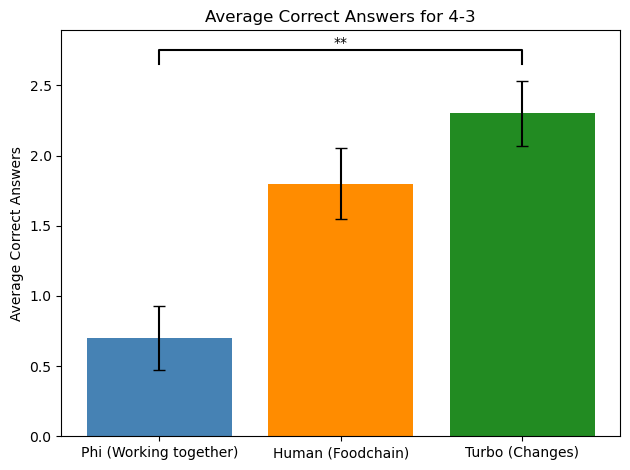

In [22]:
# 4-3

avgs_3 = [avg_phi3, avg_human3, avg_turbo3] 
ses_3 = [se_phi3, se_human3, se_turbo3]

# Create bar plot
x_positions = np.arange(len(avgs_3))  # [0, 1, 2]
labels = ['Phi (Working together)', 'Human (Foodchain)', 'Turbo (Changes)']

plt.bar(x_positions, avgs_3, yerr=ses_3, color=model_colors, capsize=4)
plt.xticks(x_positions, labels)
plt.ylabel('Average Correct Answers')
plt.title('Average Correct Answers for 4-3')

# Add annotation for significant difference
# Turbo and phi
x1, x2 = 0, 2  # Positions of the bars to annotate (blue and green)
y, h, col = max(avgs_3) + max(ses_3) + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '**', ha='center', va='bottom', color=col)

plt.tight_layout()
plt.show()

In [23]:
# Average correct answers per class
avg_class1 = np.mean(avgs['4-1'])
se_class1 = np.std(avgs['4-1']) / np.sqrt(3)
avg_class2 = np.mean(avgs['4-2'])
se_class2 = np.std(avgs['4-2']) / np.sqrt(3)
avg_class3 = np.mean(avgs['4-3'])
se_class3 = np.std(avgs['4-3']) / np.sqrt(3)

In [24]:
# Difference significance
correct_ans_1 = df1[correct_answers_columns].melt(var_name='class 4-1', value_name='correct_answers')['correct_answers']
correct_ans_2 = df2[correct_answers_columns].melt(var_name='class 4-2', value_name='correct_answers')['correct_answers']
correct_ans_3 = df3[correct_answers_columns].melt(var_name='class 4-3', value_name='correct_answers')['correct_answers']
stat, p = kruskal(correct_ans_1, correct_ans_2, correct_ans_3)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
correct_ans_1 = df1[correct_answers_columns].melt(var_name='class 4-1', value_name='correct_answers')
correct_ans_1['class'] = '4-1'
correct_ans_2 = df2[correct_answers_columns].melt(var_name='class 4-2', value_name='correct_answers')
correct_ans_2['class'] = '4-2'
correct_ans_3 = df3[correct_answers_columns].melt(var_name='class 4-3', value_name='correct_answers')
correct_ans_3['class'] = '4-3'
melted = pd.concat([correct_ans_1, correct_ans_2, correct_ans_3])

# Perform Dunn's post-hoc test if Kruskal-Wallis test is significant
if p < 0.05:
    dunn_result = posthoc_dunn(melted, val_col='correct_answers', group_col='class', p_adjust='bonferroni')
    print("\nDunn's Post-hoc Test Results:")
    print(dunn_result)
else:
    print("No significant differences found. Post-hoc test not performed.")


Kruskal-Wallis Test: H=19.81, p=0.000

Dunn's Post-hoc Test Results:
          4-1       4-2       4-3
4-1  1.000000  0.000026  0.134947
4-2  0.000026  1.000000  0.118736
4-3  0.134947  0.118736  1.000000


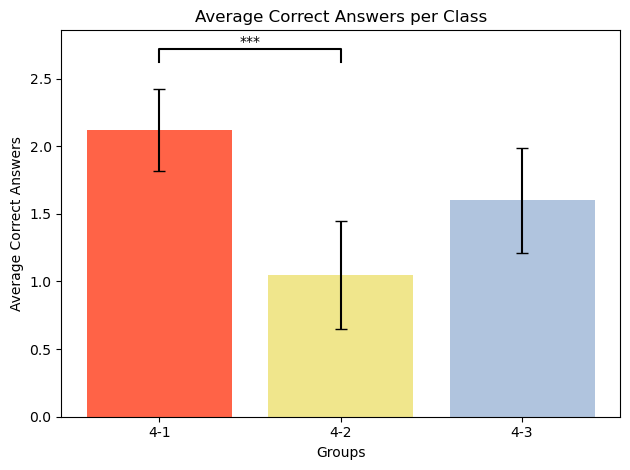

In [25]:
# Plot
x = np.arange(3)
y = [avg_class1, avg_class2, avg_class3]
se = [se_class1, se_class2, se_class3]
class_colors = ['tomato', 'khaki', 'lightsteelblue']

plt.bar(x, y, yerr=se, capsize=4, color=class_colors)
plt.xlabel('Groups')
plt.ylabel('Average Correct Answers')
plt.title('Average Correct Answers per Class')
plt.xticks(x, groups)

# Add annotation for significant difference
# 4-1 and 4-2
x1, x2 = 0, 1  # Positions of the bars to annotate (blue and green)
y, h, col = max(y) + max(se) + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '***', ha='center', va='bottom', color=col)

plt.tight_layout()
plt.show()


# Average correct answers per model

In [26]:
# Average correct answers per model
avg_model = {
    'Phi': [avg_phi1,avg_phi2,avg_phi3],
    'Human': [avg_human1, avg_human2, avg_human3],
    'Turbo': [avg_turbo1, avg_turbo2, avg_turbo3],
}

avg_phi = np.mean(avg_model['Phi'])
se_phi = np.std(avg_model['Phi']) / np.sqrt(3)
avg_human = np.mean(avg_model['Human'])
se_human = np.std(avg_model['Human']) / np.sqrt(3)
avg_turbo = (np.mean(avg_model['Turbo']))
se_turbo = np.std(avg_model['Turbo']) / np.sqrt(3)

In [27]:
# Combine data into Series
correct_ans_phi = pd.concat([
    df1['Nb correct answers_phi'], 
    df2['Nb correct answers_phi'], 
    df3['Nb correct answers_phi']
])

correct_ans_human = pd.concat([
    df1['Nb correct answers_human'], 
    df2['Nb correct answers_human'], 
    df3['Nb correct answers_human']
])

correct_ans_turbo = pd.concat([
    df1['Nb correct answers_turbo'], 
    df2['Nb correct answers_turbo'], 
    df3['Nb correct answers_turbo']
])

# Perform Kruskal-Wallis test directly on the numerical data
stat, p = kruskal(correct_ans_phi, correct_ans_human, correct_ans_turbo)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
correct_ans_phi = correct_ans_phi.reset_index(drop=True)
correct_ans_human = correct_ans_human.reset_index(drop=True)
correct_ans_turbo = correct_ans_turbo.reset_index(drop=True)
correct_ans = pd.concat([correct_ans_phi, correct_ans_human, correct_ans_turbo], axis=1)
correct_ans.columns = ['Phi', 'Human', 'Turbo']
correct_ans = correct_ans.melt(var_name='model', value_name='correct_answers')

# Perform Dunn's post-hoc test if Kruskal-Wallis test is significant
if p < 0.05:
    dunn_result = posthoc_dunn(correct_ans, val_col='correct_answers', group_col='model', p_adjust='bonferroni')
    print("\nDunn's Post-hoc Test Results:")
    print(dunn_result)
else:
    print("No significant differences found. Post-hoc test not performed.")

Kruskal-Wallis Test: H=8.27, p=0.016

Dunn's Post-hoc Test Results:
          Human       Phi     Turbo
Human  1.000000  1.000000  0.036862
Phi    1.000000  1.000000  0.039763
Turbo  0.036862  0.039763  1.000000


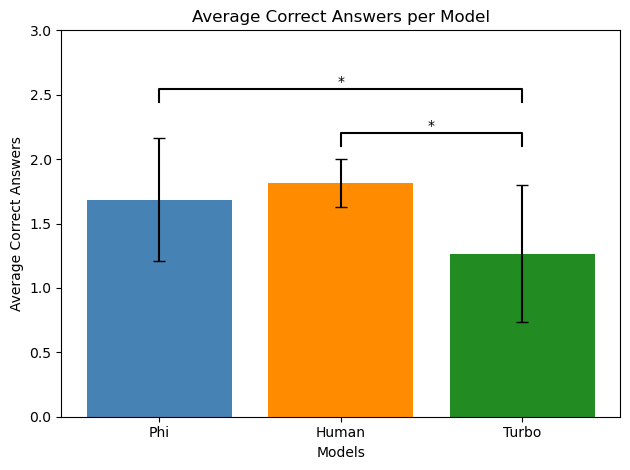

In [28]:
# Plot
y = [avg_phi, avg_human, avg_turbo]
se = [se_phi, se_human, se_turbo]

plt.bar(x, y, yerr=se, capsize=4, color=model_colors)
plt.xlabel('Models')
plt.ylabel('Average Correct Answers')
plt.title('Average Correct Answers per Model')
plt.xticks(x, models)
plt.ylim(0,3)

# Add annotation for significant difference
# Phi and Turbo
x1, x2 = 0, 2  # Positions of the bars to annotate (blue and green)
y, h, col = max(y) + max(se) + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '*', ha='center', va='bottom', color=col)

# Turbo and Human
x1, x2 = 1, 2  # Positions of the bars to annotate (orange and green)
y, h, col = avg_human + se_human + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '*', ha='center', va='bottom', color=col)

plt.tight_layout()
plt.show()

# Perceived Learning Scores

## Per Group

In [29]:
# 4-1

learn_phi1 = df1['Q2_phi']
learn_human1 = df1['Q2_human']
learn_turbo1 = df1['Q2_turbo']

# Perform Kruskal-Wallis test
stat, p = kruskal(learn_phi1, learn_human1, learn_turbo1)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
melted = df1[['Q2_phi', 'Q2_human', 'Q2_turbo']].melt(var_name='model', value_name='learn_scores')
dunn_result = posthoc_dunn(melted, val_col='learn_scores', group_col='model', p_adjust='bonferroni')
print(dunn_result)

Kruskal-Wallis Test: H=2.07, p=0.355
          Q2_human    Q2_phi  Q2_turbo
Q2_human  1.000000  0.843354  1.000000
Q2_phi    0.843354  1.000000  0.517032
Q2_turbo  1.000000  0.517032  1.000000


In [30]:


#  Correlations between perceived learning and correct answers
correct_phi1 = df1['Nb correct answers_phi']
correct_human1 = df1['Nb correct answers_human']
correct_turbo1 = df1['Nb correct answers_turbo']

# Phi
corr_phi1 = spearmanr(correct_phi1,learn_phi1)
print(f"Phi: r={corr_phi1[0]:.2f}, p={corr_phi1[1]:.3f}")
# Human
corr_human1 = spearmanr(correct_human1,learn_human1)
print(f"Human: r={corr_human1[0]:.2f}, p={corr_human1[1]:.3f}")
# Turbo
corr_turbo1 = spearmanr(correct_turbo1,learn_turbo1)
print(f"Turbo: r={corr_turbo1[0]:.2f}, p={corr_turbo1[1]:.3f}")

Phi: r=-0.04, p=0.891
Human: r=-0.06, p=0.842
Turbo: r=-0.17, p=0.567


In [31]:
# 4-2

learn_phi2 = df2['Q2_phi']
learn_human2 = df2['Q2_human']
learn_turbo2 = df2['Q2_turbo']

# Perform Kruskal-Wallis test
stat, p = kruskal(learn_phi2, learn_human2, learn_turbo2)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
melted = df2[['Q2_phi', 'Q2_human', 'Q2_turbo']].melt(var_name='model', value_name='learn_scores')
dunn_result = posthoc_dunn(melted, val_col='learn_scores', group_col='model', p_adjust='bonferroni')
print(dunn_result)

Kruskal-Wallis Test: H=2.21, p=0.331
          Q2_human   Q2_phi  Q2_turbo
Q2_human   1.00000  1.00000   0.91608
Q2_phi     1.00000  1.00000   0.44594
Q2_turbo   0.91608  0.44594   1.00000


In [32]:
# Correlations between perceived learning and correct answers
correct_phi2 = df2['Nb correct answers_phi']
correct_human2 = df2['Nb correct answers_human']
correct_turbo2 = df2['Nb correct answers_turbo']

# Phi
corr_phi2 = spearmanr(correct_phi2,learn_phi2)
print(f"Phi: r={corr_phi2[0]:.2f}, p={corr_phi2[1]:.3f}")
# Human
corr_human2 = spearmanr(correct_human2,learn_human2)
print(f"Human: r={corr_human2[0]:.2f}, p={corr_human2[1]:.3f}")
# Turbo
corr_turbo2 = spearmanr(correct_turbo2,learn_turbo2)
print(f"Turbo: r={corr_turbo2[0]:.2f}, p={corr_turbo2[1]:.3f}")


Phi: r=0.57, p=0.032
Human: r=-0.01, p=0.981
Turbo: r=0.07, p=0.812


In [33]:
# 4-3

learn_phi3 = df3['Q2_phi']
learn_human3 = df3['Q2_human']
learn_turbo3 = df3['Q2_turbo']

# Perform Kruskal-Wallis test
stat, p = kruskal(learn_phi3, learn_human3, learn_turbo3)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
melted = df3[['Q2_phi', 'Q2_human', 'Q2_turbo']].melt(var_name='model', value_name='learn_scores')
dunn_result = posthoc_dunn(melted, val_col='learn_scores', group_col='model', p_adjust='bonferroni')
print(dunn_result)

Kruskal-Wallis Test: H=1.72, p=0.422
          Q2_human    Q2_phi  Q2_turbo
Q2_human  1.000000  0.827658  1.000000
Q2_phi    0.827658  1.000000  0.714788
Q2_turbo  1.000000  0.714788  1.000000


In [34]:
# Correlations between perceived learning and correct answers
correct_phi3 = df3['Nb correct answers_phi']
correct_human3 = df3['Nb correct answers_human']
correct_turbo3 = df3['Nb correct answers_turbo']

# Phi
corr_phi3 = spearmanr(correct_phi3,learn_phi3)
print(f"Phi: r={corr_phi3[0]:.2f}, p={corr_phi3[1]:.3f}")
# Human
corr_human3 = spearmanr(correct_human3,learn_human3)
print(f"Human: r={corr_human3[0]:.2f}, p={corr_human3[1]:.3f}")
# Turbo
corr_turbo3 = spearmanr(correct_turbo3,learn_turbo3)
print(f"Turbo: r={corr_turbo3[0]:.2f}, p={corr_turbo3[1]:.3f}")

Phi: r=0.24, p=0.500
Human: r=-0.52, p=0.122
Turbo: r=-0.32, p=0.375


In [35]:
# 4-1

learn_phi1 = df1['Q2_phi'].mean()
learn_se_phi1 = df1['Q2_phi'].std() / np.sqrt(n1)
learn_human1 = df1['Q2_human'].mean()
learn_se_human1 = df1['Q2_human'].std() / np.sqrt(n1)
learn_turbo1 = df1['Q2_turbo'].mean()
learn_se_turbo1 = df1['Q2_turbo'].std() / np.sqrt(n1)

print('Average of learning for 4-1')
print('Phi:', '{:.2f}'.format(learn_phi1))
print('Human:', '{:.2f}'.format(learn_human1))
print('Turbo:', '{:.2f}'.format(learn_turbo1))
print()

# 4-2
learn_phi2 = df2['Q2_phi'].mean()
learn_se_phi2 = df2['Q2_phi'].std() / np.sqrt(n2)
learn_human2 = df2['Q2_human'].mean()
learn_se_human2 = df2['Q2_human'].std() / np.sqrt(n2)
learn_turbo2 = df2['Q2_turbo'].mean()
learn_se_turbo2 = df2['Q2_turbo'].std() / np.sqrt(n2)

print('Average of learning for 4-2')
print('Phi:', '{:.2f}'.format(learn_phi2))
print('Human:', '{:.2f}'.format(learn_human2))
print('Turbo:', '{:.2f}'.format(learn_turbo2))
print()

# 4-3
learn_phi3 = df3['Q2_phi'].mean()
learn_se_phi3 = df3['Q2_phi'].std() / np.sqrt(n3)
learn_human3 = df3['Q2_human'].mean()
learn_se_human3 = df3['Q2_human'].std() / np.sqrt(n3)
learn_turbo3 = df3['Q2_turbo'].mean()
learn_se_turbo3 = df3['Q2_turbo'].std() / np.sqrt(n3)

print('Average of learning for 4-3')
print('Phi:', '{:.2f}'.format(learn_phi3))
print('Human:', '{:.2f}'.format(learn_human3))
print('Turbo:', '{:.2f}'.format(learn_turbo3))
print()


Average of learning for 4-1
Phi: 6.14
Human: 4.86
Turbo: 4.50

Average of learning for 4-2
Phi: 6.07
Human: 5.71
Turbo: 4.79

Average of learning for 4-3
Phi: 5.20
Human: 6.60
Turbo: 6.80



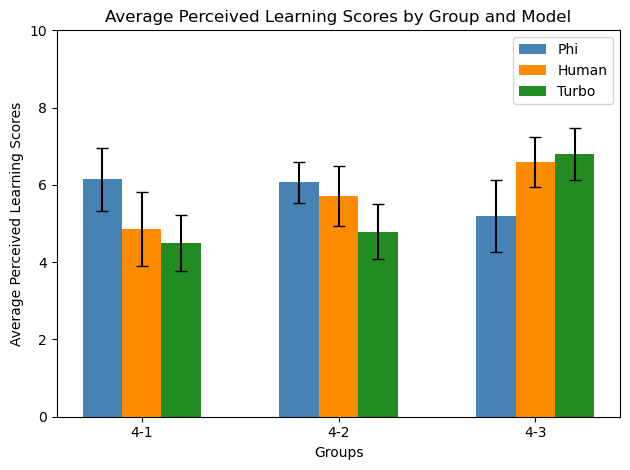

In [36]:
groups = ['4-1', '4-2', '4-3']
models = ['Phi', 'Human', 'Turbo']

# Average correct answers
learn_scores = {
    '4-1': [learn_phi1, learn_human1, learn_turbo1],
    '4-2': [learn_phi2, learn_human2, learn_turbo2],
    '4-3': [learn_phi3, learn_human3, learn_turbo3],
} 

# Standard errors
ses = {
    '4-1': [learn_se_phi1, learn_se_human1, learn_se_turbo1],
    '4-2': [learn_se_phi2, learn_se_human2, learn_se_turbo2],
    '4-3': [learn_se_phi3, learn_se_human3, learn_se_turbo3],
}

# Plotting
x = np.arange(len(groups))  # Group positions
width = 0.2  # Bar width

fig, ax = plt.subplots()

# Plot each model
for i, model in enumerate(models):
    ax.bar(x + i * width, [learn_scores[group][i] for group in groups], width, label=model, color=model_colors[i], yerr = [ses[group][i] for group in groups], capsize=4)

# Customizing the plot
ax.set_ylim(0,10)
ax.set_xlabel('Groups')
ax.set_ylabel('Average Perceived Learning Scores')
ax.set_title('Average Perceived Learning Scores by Group and Model')
ax.set_xticks(x + width)
ax.set_xticklabels(groups)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

## Per Model

In [37]:
# Average learning scores per model
learn_model = {
    'Phi': [learn_phi1,learn_phi2,learn_phi3],
    'Human': [learn_human1, learn_human2, learn_human3],
    'Turbo': [learn_turbo1, learn_turbo2, learn_turbo3],
}

learn_phi = np.mean(learn_model['Phi'])
se_learn_phi = np.std(learn_model['Phi']) / np.sqrt(3)
learn_human = np.mean(learn_model['Human'])
se_learn_human = np.std(learn_model['Human']) / np.sqrt(3)
learn_turbo = (np.mean(learn_model['Turbo']))
se_learn_turbo = np.std(learn_model['Turbo']) / np.sqrt(3)

# Combine data into Series
learn_score_phi = pd.concat([
    df1['Q2_phi'], 
    df2['Q2_phi'], 
    df3['Q2_phi']
])

learn_score_human = pd.concat([
    df1['Q2_human'], 
    df2['Q2_human'], 
    df3['Q2_human']
])

learn_score_turbo = pd.concat([
    df1['Q2_turbo'], 
    df2['Q2_turbo'], 
    df3['Q2_turbo']
])

# Perform Kruskal-Wallis test directly on the numerical data
stat, p = kruskal(learn_score_phi, learn_score_human, learn_score_turbo)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
learn_score_phi = learn_score_phi.reset_index(drop=True)
learn_score_human = learn_score_human.reset_index(drop=True)
learn_score_turbo = learn_score_turbo.reset_index(drop=True)
learn_score = pd.concat([learn_score_phi, learn_score_human, learn_score_turbo], axis=1)
learn_score.columns = ['Phi', 'Human', 'Turbo']
learn_score = learn_score.melt(var_name='model', value_name='learning score')

# Perform Dunn's post-hoc test if Kruskal-Wallis test is significant
if p < 0.05:
    dunn_result = posthoc_dunn(learn_score, val_col='learning score', group_col='model', p_adjust='bonferroni')
    print("\nDunn's Post-hoc Test Results:")
    print(dunn_result)
else:
    print("No significant differences found. Post-hoc test not performed.")

Kruskal-Wallis Test: H=1.11, p=0.575
No significant differences found. Post-hoc test not performed.


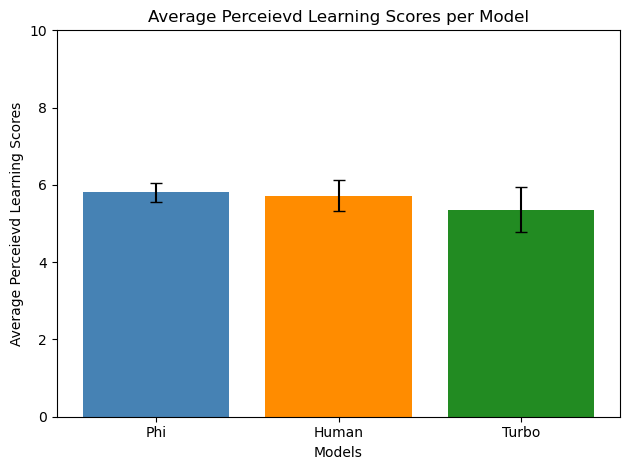

In [38]:
# Plot
y = [learn_phi, learn_human, learn_turbo]
se = [se_learn_phi, se_learn_human, se_learn_turbo]

plt.bar(x, y, yerr=se, capsize=4, color=model_colors)
plt.xlabel('Models')
plt.ylabel('Average Perceievd Learning Scores')
plt.title('Average Perceievd Learning Scores per Model')
plt.xticks(x, models)
plt.ylim(0,10)

plt.tight_layout()
plt.show()

# Enjoyment scores

## Per day

In [39]:
# Average of how much they liked the activity

# 4-1
avg_like_phi1 = df1['Q1_phi'].mean()
se_like_phi1 = df1['Q1_phi'].std() / np.sqrt(n1)
avg_like_human1 = df1['Q1_human'].mean()
se_like_human1 = df1['Q1_human'].std() / np.sqrt(n1)
avg_like_turbo1 = df1['Q1_turbo'].mean()
se_like_turbo1 = df1['Q1_turbo'].std() / np.sqrt(n1)

In [40]:
like_phi = df1['Q1_phi']
like_human = df1['Q1_human']
like_turbo = df1['Q1_turbo']

# Perform Kruskal-Wallis test
stat, p = kruskal(like_phi, like_human, like_turbo)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
melted = df1[['Q1_phi', 'Q1_human', 'Q1_turbo']].melt(var_name='model', value_name='liked_scores')
dunn_result = posthoc_dunn(melted, val_col='liked_scores', group_col='model', p_adjust='bonferroni')
print(dunn_result)

Kruskal-Wallis Test: H=13.97, p=0.001
          Q1_human    Q1_phi  Q1_turbo
Q1_human  1.000000  0.028393  0.000857
Q1_phi    0.028393  1.000000  0.904647
Q1_turbo  0.000857  0.904647  1.000000


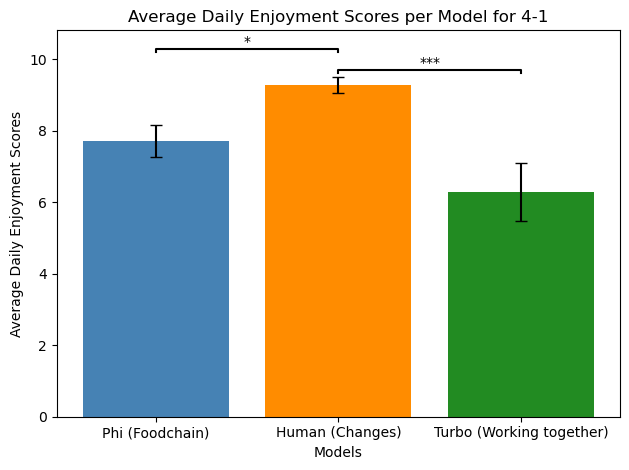

In [41]:
# Plotting
x = np.arange(3)
y = [avg_like_phi1, avg_like_human1, avg_like_turbo1]
se = [se_like_phi1, se_like_human1, se_like_turbo1]
xlabels = ['Phi (Foodchain)', 'Human (Changes)', 'Turbo (Working together)']

plt.bar(x, y, yerr=se, capsize=4, color=model_colors)
plt.xlabel('Models')
plt.ylabel('Average Daily Enjoyment Scores')
plt.title('Average Daily Enjoyment Scores per Model for 4-1')
plt.xticks(x, xlabels)

# Add annotation for significant difference
# Phi and Human
x1, x2 = 0, 1  # Positions of the bars to annotate (blue and orange)
y, h, col = max(y) + max(se) + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '*', ha='center', va='bottom', color=col)

# Human and Turbo
x1, x2 = 1, 2  # Positions of the bars to annotate (orange and green)
y, h, col = avg_like_human1 + se_like_human1 + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '***', ha='center', va='bottom', color=col)

plt.tight_layout()
plt.show()

In [42]:
# 4-2
avg_like_phi2 = df2['Q1_phi'].mean()
se_like_phi2 = df2['Q1_phi'].std() / np.sqrt(n2)
avg_like_human2 = df2['Q1_human'].mean()
se_like_human2 = df2['Q1_human'].std() / np.sqrt(n2)
avg_like_turbo2 = df2['Q1_turbo'].mean()
se_like_turbo2 = df2['Q1_turbo'].std() / np.sqrt(n2)


In [43]:
like_phi = df2['Q1_phi']
like_human = df2['Q1_human']
like_turbo = df2['Q1_turbo']

# Perform Kruskal-Wallis test
stat, p = kruskal(like_phi, like_human, like_turbo)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
melted = df2[['Q1_phi', 'Q1_human', 'Q1_turbo']].melt(var_name='model', value_name='liked_scores')
dunn_result = posthoc_dunn(melted, val_col='liked_scores', group_col='model', p_adjust='bonferroni')
print(dunn_result)

Kruskal-Wallis Test: H=1.24, p=0.539
          Q1_human   Q1_phi  Q1_turbo
Q1_human       1.0  1.00000   1.00000
Q1_phi         1.0  1.00000   0.83069
Q1_turbo       1.0  0.83069   1.00000


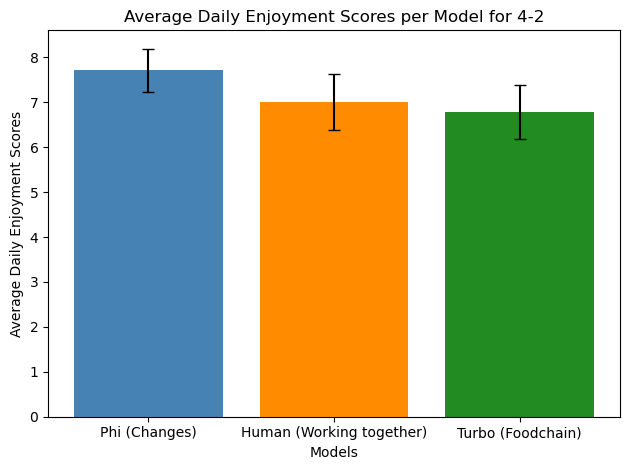

In [44]:
# Plotting
x = np.arange(3)
y = [avg_like_phi2, avg_like_human2, avg_like_turbo2]
se = [se_like_phi2, se_like_human2, se_like_turbo2]
xlabels = ['Phi (Changes)', 'Human (Working together)', 'Turbo (Foodchain)']

plt.bar(x, y, yerr=se, capsize=4, color=model_colors)
plt.xlabel('Models')
plt.ylabel('Average Daily Enjoyment Scores')
plt.title('Average Daily Enjoyment Scores per Model for 4-2')
plt.xticks(x, xlabels)

# There is no significant difference between the models

plt.tight_layout()
plt.show()

In [45]:
# 4-3
avg_like_phi3 = df3['Q1_phi'].mean()
se_like_phi3 = df3['Q1_phi'].std() / np.sqrt(n3)
avg_like_human3 = df3['Q1_human'].mean()
se_like_human3 = df3['Q1_human'].std() / np.sqrt(n3)
avg_like_turbo3 = df3['Q1_turbo'].mean()
se_like_turbo3 = df3['Q1_turbo'].std() / np.sqrt(n3)

In [46]:
like_phi = df3['Q1_phi']
like_human = df3['Q1_human']
like_turbo = df3['Q1_turbo']

# Perform Kruskal-Wallis test
stat, p = kruskal(like_phi, like_human, like_turbo)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
melted = df3[['Q1_phi', 'Q1_human', 'Q1_turbo']].melt(var_name='model', value_name='liked_scores')
dunn_result = posthoc_dunn(melted, val_col='liked_scores', group_col='model', p_adjust='bonferroni')
print(dunn_result)

Kruskal-Wallis Test: H=2.92, p=0.232
          Q1_human    Q1_phi  Q1_turbo
Q1_human  1.000000  1.000000  0.918831
Q1_phi    1.000000  1.000000  0.269387
Q1_turbo  0.918831  0.269387  1.000000


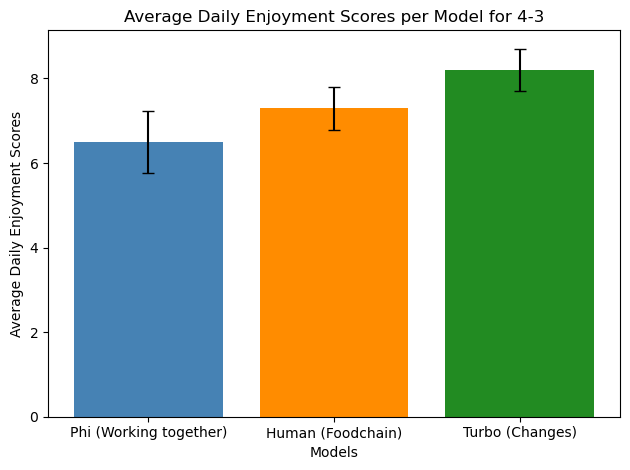

In [47]:
# Plotting
x = np.arange(3)
y = [avg_like_phi3, avg_like_human3, avg_like_turbo3]
se = [se_like_phi3, se_like_human3, se_like_turbo3]
xlabels = ['Phi (Working together)', 'Human (Foodchain)', 'Turbo (Changes)']

plt.bar(x, y, yerr=se, capsize=4, color=model_colors)
plt.xlabel('Models')
plt.ylabel('Average Daily Enjoyment Scores')
plt.title('Average Daily Enjoyment Scores per Model for 4-3')
plt.xticks(x, xlabels)

# There is no significant difference between the models

plt.tight_layout()
plt.show()

For 4-1, the students said they enjoyed the Human session more than Phi session even though they had more correct answers in Phi.
For the other groups, the orders of correct answers and enjoyment scores are the same. My hypothesis is: the group 4-1 liked the story generated by the teacher more even though the questions were hard to answer because it contained their names.

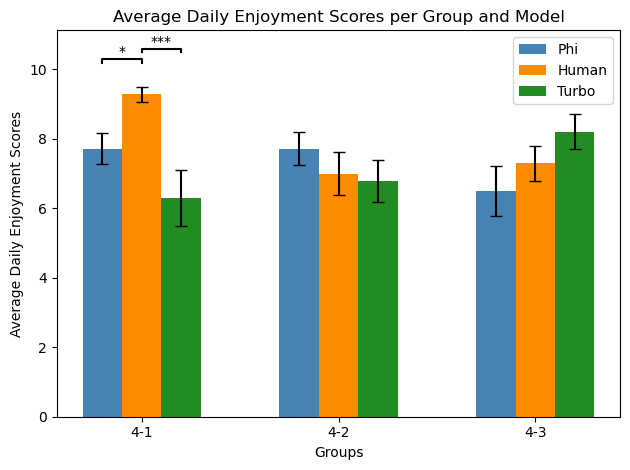

In [48]:
# Average daily enjoyment scores
avg_likes = {
    '4-1': [avg_like_phi1, avg_like_human1, avg_like_turbo1],
    '4-2': [avg_like_phi2, avg_like_human2, avg_like_turbo2],
    '4-3': [avg_like_phi3, avg_like_human3, avg_like_turbo3],
} 

# Standard errors
se_likes = {
    '4-1': [se_like_phi1, se_like_human1, se_like_turbo1],
    '4-2': [se_like_phi2, se_like_human2, se_like_turbo2],
    '4-3': [se_like_phi3, se_like_human3, se_like_turbo3],
}

# Plotting
x = np.arange(len(groups))  # Group positions
width = 0.2  # Bar width

fig, ax = plt.subplots()

# Plot each model
for i, model in enumerate(models):
    ax.bar(x + i * width, [avg_likes[group][i] for group in groups], width, label=model, color=model_colors[i], yerr = [se_likes[group][i] for group in groups], capsize=4)

# Customizing the plot
ax.set_xlabel('Groups')
ax.set_ylabel('Average Daily Enjoyment Scores')
ax.set_title('Average Daily Enjoyment Scores per Group and Model')
ax.set_xticks(x + width)
ax.set_xticklabels(groups)
ax.legend()

# Add annotation for significance idfferences
# 4-1
x1, x2 = 0, 0.2  # Positions of the bars to annotate (blue and green)
y, h, col = max(avg_likes['4-1']) + max(se_likes['4-1']) + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '*', ha='center', va='bottom', color=col)
x1, x2 = 0.2, 0.4  # Positions of the bars to annotate (orange and green)
y, h, col = max(avg_likes['4-1']) + max(se_likes['4-1']) + 0.4, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '***', ha='center', va='bottom', color=col)
# Show plot
plt.tight_layout()
plt.show()

## In posttest (final day)

In [49]:
# Multiply by 2 to be consistent with the other scores (0-10)

# 4-1
enj_phi1 = posttest1['Q1'].mean() * 2
se_enj_phi1 = posttest1['Q1'].std() * 2 / np.sqrt(n1)
enj_human1 = posttest1['Q2'].mean() * 2
se_enj_human1 = posttest1['Q2'].std() * 2 / np.sqrt(n1)
enj_turbo1 = posttest1['Q3'].mean() * 2
se_enj_turbo1 = posttest1['Q3'].std() * 2 / np.sqrt(n1)

print('Average of how much they enjoyed the story for 4-1')
print('Phi:', '{:.2f}'.format(enj_phi1))     # food-chain
print('Human:', '{:.2f}'.format(enj_human1)) # changes in the environment
print('Turbo:', '{:.2f}'.format(enj_turbo1)) # working together

# 4-2
enj_phi2 = posttest2['Q2(phi)'].mean() * 2
se_enj_phi2 = posttest2['Q2(phi)'].std() * 2 / np.sqrt(n2)
enj_human2 = posttest2['Q3(human)'].mean() * 2
se_enj_human2 = posttest2['Q3(human)'].std() * 2 / np.sqrt(n2)
enj_turbo2 = posttest2['Q1(turbo)'].mean() * 2
se_enj_turbo2 = posttest2['Q1(turbo)'].std() * 2 / np.sqrt(n2)

print('Average of how much they enjoyed the story for 4-2')
print('Phi:', '{:.2f}'.format(enj_phi2))     # changes in the environment
print('Human:', '{:.2f}'.format(enj_human2)) # working together
print('Turbo:', '{:.2f}'.format(enj_turbo2)) # food-chain

# 4-3
enj_phi3 = posttest3['Q3(phi)'].mean() * 2
se_enj_phi3 = posttest3['Q3(phi)'].std() * 2 / np.sqrt(n3)
enj_human3 = posttest3['Q1(human)'].mean() * 2
se_enj_human3 = posttest3['Q1(human)'].std() * 2 / np.sqrt(n3)
enj_turbo3 = posttest3['Q2(turbo)'].mean() * 2
se_enj_turbo3 = posttest3['Q2(turbo)'].std() * 2 / np.sqrt(n3)

print('Average of how much they enjoyed the story for 4-3')
print('Phi:', '{:.2f}'.format(enj_phi3))     # working together
print('Human:', '{:.2f}'.format(enj_human3)) # food-chain
print('Turbo:', '{:.2f}'.format(enj_turbo3)) # changes in the environment


Average of how much they enjoyed the story for 4-1
Phi: 7.14
Human: 9.29
Turbo: 5.71
Average of how much they enjoyed the story for 4-2
Phi: 8.29
Human: 8.71
Turbo: 5.43
Average of how much they enjoyed the story for 4-3
Phi: 7.60
Human: 7.40
Turbo: 8.00


In [50]:
phi1_day = df1['Q1_phi']
phi1_last = posttest1['Q1'] * 2

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(phi1_day, phi1_last)
print(f"Mann-Whitney U Test for Phi (4-1): U={stat:.2f}, p={p:.3f}")

human1_day = df1['Q1_human']
human1_last = posttest1['Q2'] * 2

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(human1_day, human1_last)
print(f"Mann-Whitney U Test for Human (4-1): U={stat:.2f}, p={p:.3f}")

turbo1_day = df1['Q1_turbo']
turbo1_last = posttest1['Q3'] * 2

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(turbo1_day, turbo1_last)
print(f"Mann-Whitney U Test for Turbo (4-1): U={stat:.2f}, p={p:.3f}")


Mann-Whitney U Test for Phi (4-1): U=114.00, p=0.453
Mann-Whitney U Test for Human (4-1): U=77.50, p=0.281
Mann-Whitney U Test for Turbo (4-1): U=117.00, p=0.386


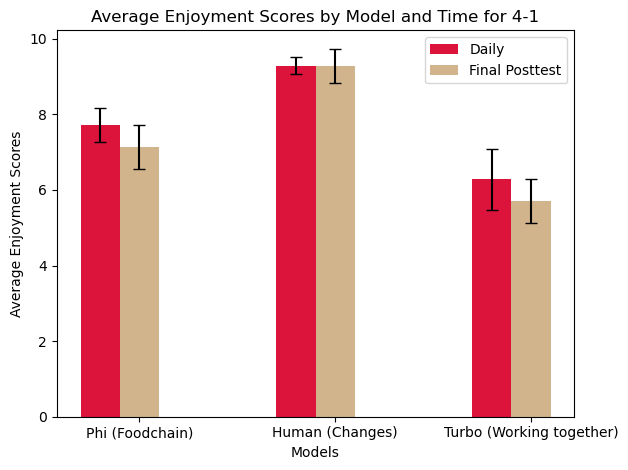

In [51]:
# Check for consistency in enjoyment scores per day and in posttest

# 4-1
data = {'Phi' : [avg_like_phi1, enj_phi1], 'Human' : [avg_like_human1, enj_human1], 'Turbo' : [avg_like_turbo1, enj_turbo1]}
models = ['Phi', 'Human', 'Turbo']
xlabels = ['Phi (Foodchain)', 'Human (Changes)', 'Turbo (Working together)']
times = ['Daily', 'Final Posttest']
colors = ['crimson', 'tan']
ses = {'Phi' : [se_like_phi1, se_enj_phi1], 'Human' : [se_like_human1, se_enj_human1], 'Turbo' : [se_like_turbo1, se_enj_turbo1]}
# Plotting
x = np.arange(len(models))  # Group positions
width = 0.2  # Bar width

fig, ax = plt.subplots()

# Plot each score
for i, time in enumerate(times):
    ax.bar(x + i * width, [data[model][i] for model in models], width, label=time, color=colors[i], yerr = [ses[model][i] for model in models], capsize=4)

# Customizing the plot
ax.set_xlabel('Models')
ax.set_ylabel('Average Enjoyment Scores')
ax.set_title('Average Enjoyment Scores by Model and Time for 4-1')
ax.set_xticks(x + width)
ax.set_xticklabels(xlabels)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [52]:
phi2_day = df2['Q1_phi']
phi2_last = posttest2['Q2(phi)'] * 2

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(phi2_day, phi2_last)
print(f"Mann-Whitney U Test for Phi (4-1): U={stat:.2f}, p={p:.3f}")

human2_day = df2['Q1_human']
human2_last = posttest2['Q3(human)'] * 2

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(human2_day, human2_last)
print(f"Mann-Whitney U Test for Human (4-1): U={stat:.2f}, p={p:.3f}")

turbo2_day = df2['Q1_turbo']
turbo2_last = posttest2['Q1(turbo)'] * 2

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(turbo2_day, turbo2_last)
print(f"Mann-Whitney U Test for Turbo (4-1): U={stat:.2f}, p={p:.3f}")

Mann-Whitney U Test for Phi (4-1): U=77.00, p=0.322
Mann-Whitney U Test for Human (4-1): U=52.00, p=0.030
Mann-Whitney U Test for Turbo (4-1): U=136.50, p=0.073


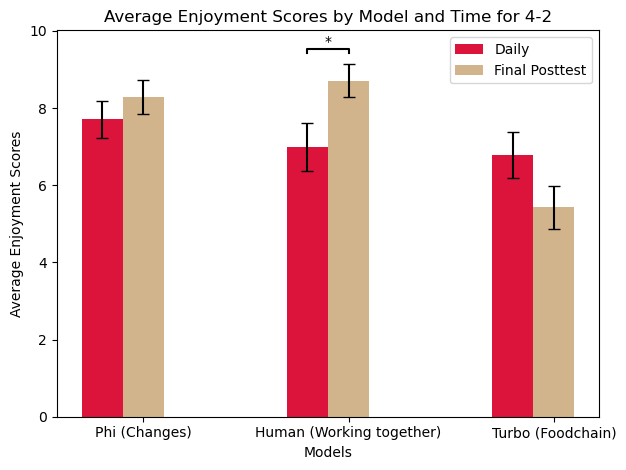

In [53]:
# 4-2
data = {'Phi' : [avg_like_phi2, enj_phi2], 'Human' : [avg_like_human2, enj_human2], 'Turbo' : [avg_like_turbo2, enj_turbo2]}
models = ['Phi', 'Human', 'Turbo']
xlabels = ['Phi (Changes)', 'Human (Working together)', 'Turbo (Foodchain)']
times = ['Daily', 'Final Posttest']
colors = ['crimson', 'tan']
ses = {'Phi' : [se_like_phi2, se_enj_phi2], 'Human' : [se_like_human2, se_enj_human2], 'Turbo' : [se_like_turbo2, se_enj_turbo2]}
# Plotting
x = np.arange(len(models))  # Group positions
width = 0.2  # Bar width

fig, ax = plt.subplots()

# Plot each score
for i, time in enumerate(times):
    ax.bar(x + i * width, [data[model][i] for model in models], width, label=time, color=colors[i] ,yerr = [ses[model][i] for model in models], capsize=4)

# Customizing the plot
ax.set_xlabel('Models')
ax.set_ylabel('Average Enjoyment Scores')
ax.set_title('Average Enjoyment Scores by Model and Time for 4-2')
ax.set_xticks(x + width)
ax.set_xticklabels(xlabels)
ax.legend()

# Add annotation for significant difference
# Human
x1, x2 = 1, 1.2
y, h, col = max(data['Human']) + max(ses['Human']) + 0.1, 0.1, 'black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1 + x2) * 0.5, y + h, '*', ha='center', va='bottom', color=col)

# Show plot
plt.tight_layout()
plt.show()

In [54]:
phi3_day = df3['Q1_phi']
phi3_last = posttest3['Q3(phi)'] * 2

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(phi3_day, phi3_last)
print(f"Mann-Whitney U Test for Phi (4-1): U={stat:.2f}, p={p:.3f}")

human3_day = df3['Q1_human']
human3_last = posttest3['Q1(human)'] * 2

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(human3_day, human3_last)
print(f"Mann-Whitney U Test for Human (4-1): U={stat:.2f}, p={p:.3f}")

turbo3_day = df3['Q1_turbo']
turbo3_last = posttest3['Q2(turbo)'] * 2

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(turbo3_day, turbo3_last)
print(f"Mann-Whitney U Test for Turbo (4-1): U={stat:.2f}, p={p:.3f}")

Mann-Whitney U Test for Phi (4-1): U=38.00, p=0.374
Mann-Whitney U Test for Human (4-1): U=48.50, p=0.938
Mann-Whitney U Test for Turbo (4-1): U=49.50, p=1.000


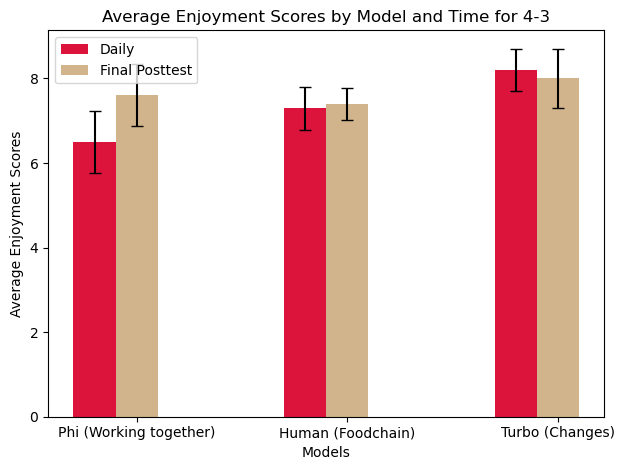

In [55]:
# 4-3
data = {'Phi' : [avg_like_phi3, enj_phi3], 'Human' : [avg_like_human3, enj_human3], 'Turbo' : [avg_like_turbo3, enj_turbo3]}
models = ['Phi', 'Human', 'Turbo']
times = ['Daily', 'Final Posttest']
colors = ['crimson', 'tan']
xlabels = ['Phi (Working together)', 'Human (Foodchain)', 'Turbo (Changes)']
ses = {'Phi' : [se_like_phi3, se_enj_phi3], 'Human' : [se_like_human3, se_enj_human3], 'Turbo' : [se_like_turbo3, se_enj_turbo3]}
# Plotting
x = np.arange(len(models))  # Group positions
width = 0.2  # Bar width

fig, ax = plt.subplots()

# Plot each score
for i, time in enumerate(times):
    ax.bar(x + i * width, [data[model][i] for model in models], width, label=time, color=colors[i], yerr = [ses[model][i] for model in models], capsize=4)

# Customizing the plot
ax.set_xlabel('Models')
ax.set_ylabel('Average Enjoyment Scores')
ax.set_title('Average Enjoyment Scores by Model and Time for 4-3')
ax.set_xticks(x + width)
ax.set_xticklabels(xlabels)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

# Average enjoyment scores per model

In [56]:
# Average like scores per model

like_score_phi = pd.concat([
    df1['Q1_phi'], 
    df2['Q1_phi'], 
    df3['Q1_phi']
], ignore_index=True)

like_score_human = pd.concat([
    df1['Q1_human'], 
    df2['Q1_human'], 
    df3['Q1_human']
], ignore_index=True)

like_score_turbo = pd.concat([
    df1['Q1_turbo'], 
    df2['Q1_turbo'], 
    df3['Q1_turbo']
], ignore_index=True)

# Perform Kruskal-Wallis test directly on the numerical data
stat, p = kruskal(like_score_phi, like_score_human, like_score_turbo)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
combined = pd.concat([like_score_phi, like_score_human, like_score_turbo], ignore_index=True)
group_labels = ['phi'] * len(like_score_phi) + ['human'] * len(like_score_human) + ['turbo'] * len(like_score_turbo)

# Create a DataFrame with values and groups
data_for_posthoc = pd.DataFrame({'Scores': combined, 'Groups': group_labels})

# Perform Dunn's test
posthoc_results = posthoc_dunn(data_for_posthoc, val_col='Scores', group_col='Groups', p_adjust='bonferroni')
print(posthoc_results)

Kruskal-Wallis Test: H=3.09, p=0.213
          human       phi     turbo
human  1.000000  0.668282  0.263517
phi    0.668282  1.000000  1.000000
turbo  0.263517  1.000000  1.000000


In [57]:
# Average like scores per model
avg_like_model = {
    'Phi': [avg_like_phi1,avg_like_phi2,avg_like_phi3],
    'Human': [avg_like_human1, avg_like_human2, avg_like_human3],
    'Turbo': [avg_like_turbo1, avg_like_turbo2, avg_like_turbo3],
}

avg_like_phi = np.mean(avg_like_model['Phi'])
se_like_phi = np.std(avg_like_model['Phi']) / np.sqrt(3)
avg_like_human = np.mean(avg_like_model['Human'])
se_like_human = np.std(avg_like_model['Human']) / np.sqrt(3)
avg_like_turbo = (np.mean(avg_like_model['Turbo']))
se_like_turbo = np.std(avg_like_model['Turbo']) / np.sqrt(3)

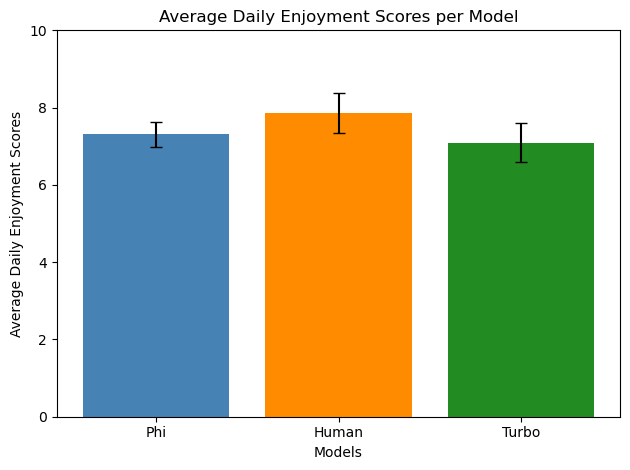

In [58]:
# Plotting
x = np.arange(3)
y = [avg_like_phi, avg_like_human, avg_like_turbo]
se = [se_like_phi, se_like_human3, se_like_turbo3]
xlabels = ['Phi', 'Human', 'Turbo']

plt.bar(x, y, yerr=se, capsize=4, color=model_colors)
plt.xlabel('Models')
plt.ylabel('Average Daily Enjoyment Scores')
plt.title('Average Daily Enjoyment Scores per Model')
plt.xticks(x, xlabels)
plt.ylim(0, 10)

# There is no significant difference between the models

plt.tight_layout()
plt.show()

# Ranks

In [59]:
# 4-1
r1 = posttest1.groupby('R1').size()
r2 = posttest1.groupby('R2').size()
r3 = posttest1.groupby('R3').size()
print('4-1')
print(r1)
print(r2)
print(r3)

4-1
R1
human    10
phi       3
turbo     1
dtype: int64
R2
human    3
phi      5
turbo    6
dtype: int64
R3
human    1
phi      6
turbo    7
dtype: int64


In [60]:
# 4-2
r1 = posttest2.groupby('R1').size()
r2 = posttest2.groupby('R2').size()
r3 = posttest2.groupby('R3').size()
print('4-2')
print(r1)
print(r2)
print(r3)

4-2
R1
human    8
phi      6
dtype: int64
R2
human    6
phi      8
dtype: int64
R3
turbo    14
dtype: int64


In [61]:
# 4-3
r1 = posttest3.groupby('R1').size()
r2 = posttest3.groupby('R2').size()
r3 = posttest3.groupby('R3').size()
print('4-3')
print(r1)
print(r2)
print(r3)

4-3
R1
human    3
phi      3
turbo    4
dtype: int64
R2
human    2
phi      4
turbo    4
dtype: int64
R3
human    5
phi      3
turbo    2
dtype: int64


Text(0.5, 1.0, "Students' Appreciation Model Ranking")

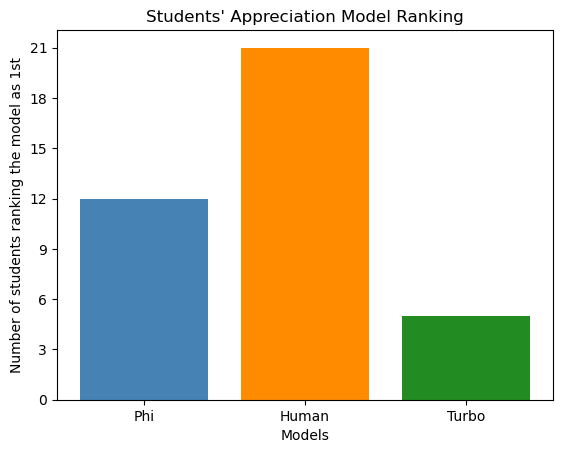

In [62]:
models = ['Phi', 'Human', 'Turbo']
nb_rank_1 =[12, 21, 5]

plt.bar(models, nb_rank_1, color=model_colors)
plt.xlabel('Models')

locs, labels = plt.yticks()  # retrieve original tick values
dloc = np.ceil(locs[1] - locs[0]).astype(int)  # get tick spacing
dloc_int = int(dloc)  # define new integer tick spacing
new_yticks = np.arange(locs.min(), locs.max(), dloc_int, dtype=int)

plt.yticks(new_yticks)
plt.ylabel('Number of students ranking the model as 1st')
plt.title('Students\' Appreciation Model Ranking')

The results are consistent with the enjoyment scores.

## Correlation between enjoyment scores and ranking

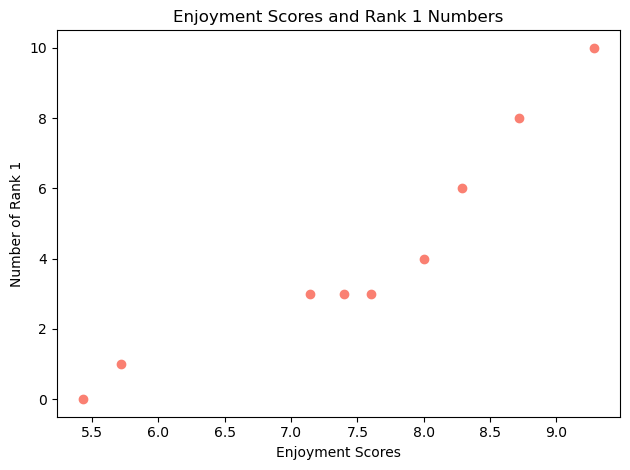

In [63]:
enj_scores = [enj_phi1, enj_human1, enj_turbo1, enj_phi2, enj_human2, enj_turbo2, enj_phi3, enj_human3, enj_turbo3]
rank1_numbers = [3, 10, 1, 6, 8, 0, 3, 3, 4]

# Scatter plot of enjoyment scores and rank 1 numbers
plt.scatter(enj_scores, rank1_numbers, color='salmon')
plt.xlabel('Enjoyment Scores')
plt.ylabel('Number of Rank 1')
plt.title('Enjoyment Scores and Rank 1 Numbers')
plt.tight_layout()
plt.show()

# Favourite subjects

In [64]:


fav1 = pretest1.groupby('Q8').size()
help1 = pretest1.groupby('Q9').size()
print('4-1')
print(fav1)
print(help1)

fav2 = pretest2.groupby('Q8').size()
help2 = pretest2.groupby('Q9').size()
print('4-2')
print(fav2)
print(help2)

fav3 = pretest3.groupby('Q8').size()
help3 = pretest3.groupby('Q9').size()
print('4-3')
print(fav3)
print(help3)


4-1
Q8
Languages and Literature    1
STEM                        7
STEM and Social Sciences    2
Social Sciences and Arts    4
dtype: int64
Q9
Languages and Literature    6
STEM                        6
Social Sciences and Arts    2
dtype: int64
4-2
Q8
Languages and Literature    1
STEM                        7
STEM and Social Sciences    1
Social Sciences and Arts    6
dtype: int64
Q9
Languages and Literature    4
STEM                        9
Social Sciences and Arts    2
dtype: int64
4-3
Q8
STEM                         1
STEM and Social Sciences    11
Social Sciences and Arts     1
dtype: int64
Q9
Languages and Literature    2
STEM                        7
STEM & Languages            1
STEM and Social Sciences    1
Social Sciences and Arts    2
dtype: int64


Most pupils like STEM subjects the most and say they need help with it the most.

# Correlation between the questions 1,2, 3 and 4 in pretest and the results

In [65]:
# Q1: Have you ever interacted with a social robot?

avg1_q1 = pretest1['Q1'].mean()
se1_q1 = pretest1['Q1'].std() / np.sqrt(n1)
avg2_q1 = pretest2['Q1'].mean()
se2_q1 = pretest2['Q1'].std() / np.sqrt(n2)
avg3_q1 = pretest3['Q1'].mean()
se3_q1 = pretest3['Q1'].std() / np.sqrt(n3)

print('Average of Q1 for 4-1')
print('{:.2f}'.format(avg1_q1))
print('Average of Q1 for 4-2')
print('{:.2f}'.format(avg2_q1))
print('Average of Q1 for 4-3')
print('{:.2f}'.format(avg3_q1))


Average of Q1 for 4-1
1.93
Average of Q1 for 4-2
1.93
Average of Q1 for 4-3
1.85


## Correlation with number of correct answers

In [66]:
# Class 4-1

# Average of Q2, Q3 and Q4
n1 = pretest1.shape[0]
avg2 = pretest1['Q2'].mean()
avg3 = pretest1['Q3'].mean()
avg4 = pretest1['Q4'].mean()
avg_41 = (avg2 + avg3 + avg4) / 3
se_41 = (pretest1['Q2'].std() + pretest1['Q3'].std() + pretest1['Q4'].std()) / (3 * np.sqrt(n1))

print('Average of Q2, Q3 and Q4 for 4-1 out of 5')
print('{:.2f}'.format(avg_41))
print('Average correct answers for 4-1 out of 3')
print('{:.2f}'.format(avg_class1)) 
print()
# Class 4-2

# Average of Q2, Q3 and Q4
n2 = pretest2.shape[0]
avg2 = pretest2['Q2'].mean()
avg3 = pretest2['Q3'].mean()
avg4 = pretest2['Q4'].mean()
avg_42 = (avg2 + avg3 + avg4) / 3
se_42 = (pretest2['Q2'].std() + pretest2['Q3'].std() + pretest2['Q4'].std()) / (3 * np.sqrt(n2))

print('Average of Q2, Q3 and Q4 for 4-2 out of 5')
print('{:.2f}'.format(avg_42))
print('Average correct answers for 4-2 out of 3')
print('{:.2f}'.format(avg_class2)) 
print()

# Class 4-3

# Average of Q2, Q3 and Q4
n3 = pretest3.shape[0]
avg2 = pretest3['Q2'].mean()
avg3 = pretest3['Q3'].mean()
avg4 = pretest3['Q4'].mean()
avg_43 = (avg2 + avg3 + avg4) / 3
se_42 = (pretest3['Q2'].std() + pretest3['Q3'].std() + pretest3['Q4'].std()) / (3 * np.sqrt(n3))

print('Average of Q2, Q3 and Q4 for 4-2 out of 5')
print('{:.2f}'.format(avg_43))
print('Average correct answers for 4-2 out of 3')
print('{:.2f}'.format(avg_class3)) 

Average of Q2, Q3 and Q4 for 4-1 out of 5
4.55
Average correct answers for 4-1 out of 3
2.12

Average of Q2, Q3 and Q4 for 4-2 out of 5
4.58
Average correct answers for 4-2 out of 3
1.05

Average of Q2, Q3 and Q4 for 4-2 out of 5
4.54
Average correct answers for 4-2 out of 3
1.60


The averages of the questions 2, 3 and 4 are similar for the 3 groups so we can't extract an insightful pattern between these averages and other scores.

# Analysis separated by day (thus by topic because each day corresponds to a topic)

In [67]:
# Average correct answers

corr_ans_day1 = pd.concat([df1['Nb correct answers_phi'], df2['Nb correct answers_turbo'], df3['Nb correct answers_human']], ignore_index=True)
corr_ans_day2 = pd.concat([df1['Nb correct answers_human'], df2['Nb correct answers_phi'], df3['Nb correct answers_turbo']], ignore_index=True)
corr_ans_day3 = pd.concat([df1['Nb correct answers_turbo'], df2['Nb correct answers_human'], df3['Nb correct answers_phi']], ignore_index=True)

stat, p = kruskal(corr_ans_day1, corr_ans_day2, corr_ans_day3)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
combined = pd.concat([corr_ans_day1, corr_ans_day2, corr_ans_day3], ignore_index=True)
group_labels = ['Day1'] * len(corr_ans_day1) + ['Day2'] * len(corr_ans_day2) + ['Day3'] * len(corr_ans_day3)

# Create a DataFrame with values and groups
data_for_posthoc = pd.DataFrame({'Scores': combined, 'Groups': group_labels})

# Perform Dunn's test
posthoc_results = posthoc_dunn(data_for_posthoc, val_col='Scores', group_col='Groups', p_adjust='bonferroni')
print(posthoc_results)


Kruskal-Wallis Test: H=10.06, p=0.007
          Day1      Day2      Day3
Day1  1.000000  0.150004  0.714953
Day2  0.150004  1.000000  0.005083
Day3  0.714953  0.005083  1.000000


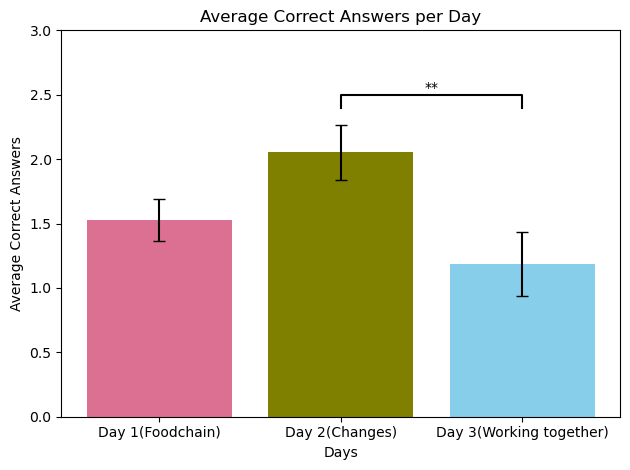

In [68]:
# We previously computed all the values

# Day 1
# Phi 4-1
# Turbo 4-2
# Human 4-3

avg_corr_day1 = (avg_phi1 + avg_turbo2 + avg_human3) / 3
se_corr_day1 = (se_phi1 + se_turbo2 + se_human3) / 3

# Day 2
# Human 4-1
# Phi 4-2
# Turbo 4-3

avg_corr_day2 = (avg_human1 + avg_phi2 + avg_turbo3) / 3
se_corr_day2 = (se_human1 + se_phi2 + se_turbo3) / 3

# Day 3
# Turbo 4-1
# Human 4-2
# Phi 4-3

avg_corr_day3 = (avg_turbo1 + avg_human2 + avg_phi3) / 3
se_corr_day3 = (se_turbo1 + se_human2 + se_phi3) / 3

# Plotting
x = np.arange(3)
y = [avg_corr_day1, avg_corr_day2, avg_corr_day3]
se = [se_corr_day1, se_corr_day2, se_corr_day3]
colors = ['palevioletred', 'olive', 'skyblue']

plt.bar(x, y, yerr=se, capsize=4, color=colors)
plt.xlabel('Days')
plt.ylabel('Average Correct Answers')
plt.title('Average Correct Answers per Day')
plt.xticks(x, ['Day 1(Foodchain)', 'Day 2(Changes)', 'Day 3(Working together)'])
plt.ylim(0,3)

# Add annotation for significant difference
# Day 2 and Day 3
x1, x2 = 1, 2  # Positions of the bars to annotate (orange and green)
y, h, col = max(y) + max(se) + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '**', ha='center', va='bottom', color=col)

plt.tight_layout()
plt.show()


In [69]:
# Average enjoyment scores

like_score_day1 = pd.concat([df1['Q1_phi'], df2['Q1_turbo'], df3['Q1_human']], ignore_index=True)
like_score_day2 = pd.concat([df1['Q1_human'], df2['Q1_phi'], df3['Q1_turbo']], ignore_index=True)
like_score_day3 = pd.concat([df1['Q1_turbo'], df2['Q1_human'], df3['Q1_phi']], ignore_index=True)

stat, p = kruskal(like_score_day1, like_score_day2, like_score_day3)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
combined = pd.concat([like_score_day1, like_score_day2, like_score_day3], ignore_index=True)
group_labels = ['Day1'] * len(like_score_day1) + ['Day2'] * len(like_score_day2) + ['Day3'] * len(like_score_day3)

# Create a DataFrame with values and groups
data_for_posthoc = pd.DataFrame({'Scores': combined, 'Groups': group_labels})

# Perform Dunn's test
posthoc_results = posthoc_dunn(data_for_posthoc, val_col='Scores', group_col='Groups', p_adjust='bonferroni')
print(posthoc_results)

Kruskal-Wallis Test: H=11.96, p=0.003
          Day1      Day2      Day3
Day1  1.000000  0.037043  1.000000
Day2  0.037043  1.000000  0.002716
Day3  1.000000  0.002716  1.000000


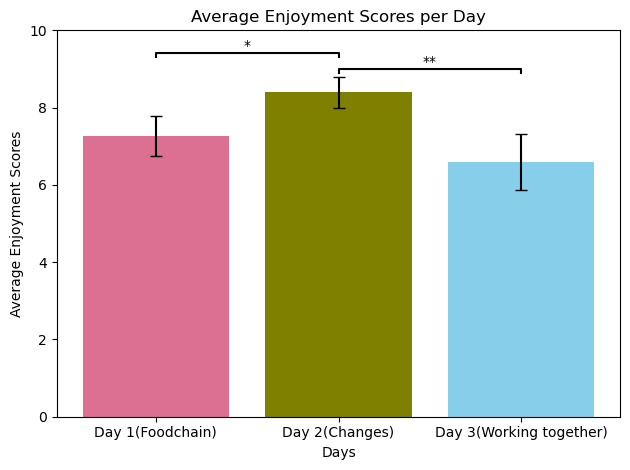

In [70]:
# We previously computed all the values

# Day 1
# Phi 4-1
# Turbo 4-2
# Human 4-3

avg_like_day1 = (avg_like_phi1 + avg_like_turbo2 + avg_like_human3) / 3
se_like_day1 = (se_like_phi1 + se_like_turbo2 + se_like_human3) / 3

# Day 2
# Human 4-1
# Phi 4-2
# Turbo 4-3

avg_like_day2 = (avg_like_human1 + avg_like_phi2 + avg_like_turbo3) / 3
se_like_day2 = (se_like_human1 + se_like_phi2 + se_like_turbo3) / 3

# Day 3
# Turbo 4-1
# Human 4-2
# Phi 4-3

avg_like_day3 = (avg_like_turbo1 + avg_like_human2 + avg_like_phi3) / 3
se_like_day3 = (se_like_turbo1 + se_like_human2 + se_like_phi3) / 3

# Plotting
x = np.arange(3)
y = [avg_like_day1, avg_like_day2, avg_like_day3]
se = [se_like_day1, se_like_day2, se_like_day3]
colors = ['palevioletred', 'olive', 'skyblue']

plt.bar(x, y, yerr=se, capsize=4, color=colors)
plt.xlabel('Days')
plt.ylabel('Average Enjoyment Scores')
plt.title('Average Enjoyment Scores per Day')
plt.xticks(x, ['Day 1(Foodchain)', 'Day 2(Changes)', 'Day 3(Working together)'])
plt.ylim(0,10)

# Add annotation for significant difference
# Day 2 and Day 1
x1, x2 = 0, 1  # Positions of the bars to annotate 
y, h, col = max(y) + max(se) + 0.2, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '*', ha='center', va='bottom', color=col)

# Day 2 and Day 3
x1, x2 = 1, 2  # Positions of the bars to annotate 
y, h, col = avg_like_day2 + se_like_day2 + 0.1, 0.1, 'black'  # Line height and color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)  # Horizontal and vertical lines
plt.text((x1 + x2) * 0.5, y + h, '**', ha='center', va='bottom', color=col)

plt.tight_layout()
plt.show()


In [71]:
# Average perceived learning scores

learn_score_day1 = pd.concat([df1['Q2_phi'], df2['Q2_turbo'], df3['Q2_human']], ignore_index=True)
learn_score_day2 = pd.concat([df1['Q2_human'], df2['Q2_phi'], df3['Q2_turbo']], ignore_index=True)
learn_score_day3 = pd.concat([df1['Q2_turbo'], df2['Q2_human'], df3['Q2_phi']], ignore_index=True)

stat, p = kruskal(learn_score_day1, learn_score_day2, learn_score_day3)
print(f"Kruskal-Wallis Test: H={stat:.2f}, p={p:.3f}")

# Combine data into a single DataFrame for the test
combined = pd.concat([learn_score_day1, learn_score_day2, learn_score_day3], ignore_index=True)
group_labels = ['Day1'] * len(learn_score_day1) + ['Day2'] * len(learn_score_day2) + ['Day3'] * len(learn_score_day3)

# Create a DataFrame with values and groups
data_for_posthoc = pd.DataFrame({'Scores': combined, 'Groups': group_labels})

# Perform Dunn's test
posthoc_results = posthoc_dunn(data_for_posthoc, val_col='Scores', group_col='Groups', p_adjust='bonferroni')
print(posthoc_results)

Kruskal-Wallis Test: H=1.28, p=0.526
      Day1      Day2      Day3
Day1   1.0  1.000000  1.000000
Day2   1.0  1.000000  0.928552
Day3   1.0  0.928552  1.000000


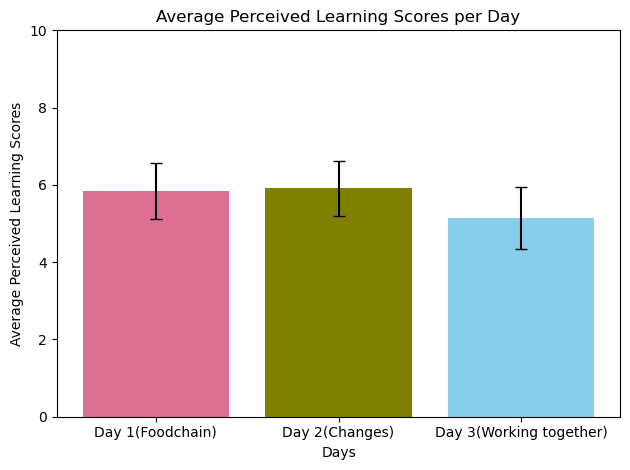

In [72]:
# We previously computed all the values

# Day 1
# Phi 4-1
# Turbo 4-2
# Human 4-3

avg_learn_day1 = (learn_phi1 + learn_turbo2 + learn_human3) / 3
learn_se_day1 = (learn_se_phi1 + learn_se_turbo2 + learn_se_human3) / 3

# Day 2
# Human 4-1
# Phi 4-2
# Turbo 4-3

avg_learn_day2 = (learn_human1 + learn_phi2 + learn_turbo3) / 3
learn_se_day2 = (learn_se_human1 + learn_se_phi2 + learn_se_turbo3) / 3

# Day 3
# Turbo 4-1
# Human 4-2
# Phi 4-3

avg_learn_day3 = (learn_turbo1 + learn_human2 + learn_phi3) / 3
learn_se_day3 = (learn_se_turbo1 + learn_se_human2 + learn_se_phi3) / 3

# Plotting
x = np.arange(3)
y = [avg_learn_day1, avg_learn_day2, avg_learn_day3]
se = [learn_se_day1, learn_se_day2, learn_se_day3]
colors = ['palevioletred', 'olive', 'skyblue']

plt.bar(x, y, yerr=se, capsize=4, color=colors)
plt.xlabel('Days')
plt.ylabel('Average Perceived Learning Scores')
plt.title('Average Perceived Learning Scores per Day')
plt.xticks(x, ['Day 1(Foodchain)', 'Day 2(Changes)', 'Day 3(Working together)'])
plt.ylim(0,10)
plt.tight_layout()
plt.show()
